In [1]:
from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import pandas as pd
from bs4 import BeautifulSoup as bs

#### 유튜브 댓글 수집

In [2]:
#1. 브라우저 실행
drive = wb.Chrome()
drive.get("https://www.youtube.com/watch?v=PtZ5-b1m4QA")

In [3]:
#2. 댓글 정보르 수집
# id가 content-text인 댓글 수집
# 스크롤내리면 리뷰개수 나옴
review = drive.find_elements(By.ID,'content-text')
len(review)

0

In [4]:
for i in review:
    print(i.text)

In [5]:
#3. 댓글정보를 갱신하기위해서 키보드end 버튼을 누름
while True:
    body = drive.find_element(By.TAG_NAME,'body')
    body.send_keys(Keys.END)
    time.sleep(0.5)

AttributeError: 'NoneType' object has no attribute 'send_keys'

#### 네이버에서 박진영검색하고 크롤링

In [6]:
#1. 크롬을 열고 네이버에 들어가기
drive = wb.Chrome()
drive.get("https://naver.com")

In [ ]:
#2. 원하는 키워드 입력하고 검색하기
#2.1 검색바를 찾기
search= drive.find_element(By.ID,'query')
#2.2 '박진영'입력하기
search.send_keys('지라라')
#2.3 검색누르기
search.send_keys(Keys.ENTER)

In [ ]:
#3. 이미지탭 클릭하기
image_tab = drive.find_element(By.CSS_SELECTOR,'#lnb > div.lnb_group > div > ul > li:nth-child(2) > a')
image_tab.click()

In [ ]:
#4. 이미지 수집
#4.1 이미지태그 수집
imgs = drive.find_elements(By.CSS_SELECTOR, 'img._image._listImage')

In [ ]:
len(imgs)

In [ ]:
#4.2이미지 태그안에 있는 src속성값 가져오기
#속성을 가져오는 함수:get_attribute()
#반복문을 사용해서 전체 img태그에 있는 src값 수집
img_url = []
for img in imgs:
    img_url.append(img.get_attribute('src'))

In [ ]:
print(img_url[0])

In [ ]:
#파일 시스템을 위한 라이브러리(파일, 폴더에 접근)
import os
#이미지의 url값을 파일로 변형시켜주는 라이브러리
from urllib.request import urlretrieve

In [ ]:
#4.3 다운받을 폴더 만들기
# C:\Users\smhrd\Python crowing 이미지 폴더를 만들고 이미지 저장
if not os.path.isdir('C:/Users/smhrd/Python crowing/이미지'):
    os.mkdir('C:/Users/smhrd/Python crowing/이미지')

In [ ]:
#4.4 이미지 폴더에 이미지를 저장
# 전체사진 인식을 하려면 시간이 필요
count = 1
for i in img_url:
    #파일저장 경로 urlretrieve()
    urlretrieve(i,'C:/Users/smhrd/Python crowing/이미지/' + str(count)+'.jpg')
    count+=1

#### 스타벅스 매장 지점명, 주소, 전화번호 수집

In [7]:
url ="https://www.starbucks.co.kr/store/store_map.do"
driver = wb.Chrome()
driver.get(url)

In [8]:
# 1. 지역검색 버튼을 클릭(클래스명 확인)
serach = driver.find_element(By.CLASS_NAME,'loca_search')
serach.click()

In [11]:
#  2. 광주지역 클릭(By.CSS_SELECTOR사용)
serach1 = driver.find_element(By.CSS_SELECTOR,'ul.sido_arae_box>li+li+li')
serach1.click()

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=104.0.5112.102)
Stacktrace:
Backtrace:
	Ordinal0 [0x005C78B3+2193587]
	Ordinal0 [0x00560681+1771137]
	Ordinal0 [0x00474070+802928]
	Ordinal0 [0x004A3533+996659]
	Ordinal0 [0x00499223+954915]
	Ordinal0 [0x004BD7AC+1103788]
	Ordinal0 [0x00498C04+953348]
	Ordinal0 [0x004BD9C4+1104324]
	Ordinal0 [0x004CDAE2+1170146]
	Ordinal0 [0x004BD5C6+1103302]
	Ordinal0 [0x004977E0+948192]
	Ordinal0 [0x004986E6+952038]
	GetHandleVerifier [0x00870CB2+2738370]
	GetHandleVerifier [0x008621B8+2678216]
	GetHandleVerifier [0x006517AA+512954]
	GetHandleVerifier [0x00650856+509030]
	Ordinal0 [0x0056743B+1799227]
	Ordinal0 [0x0056BB68+1817448]
	Ordinal0 [0x0056BC55+1817685]
	Ordinal0 [0x00575230+1856048]
	BaseThreadInitThunk [0x77B3FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77C87A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77C87A6E+238]


In [12]:
# 3. 광주지역에서 전체 지역 클릭(By.CSS_SELECTOR사용)
serach2 = driver.find_element(By.CSS_SELECTOR,'ul.gugun_arae_box>li')
serach2.click()

In [ ]:
# 4. ㅁㅇㄴㄻㄴㅇㄻㄴㅇㄻㄴㅇㄻㄴㅇㄻㄴㅇㄻㄴㅇㄹㄴㅁㅇㄹ먼아림;ㄴ이ㅏ러ㅏㅁㄴ이;낭러ㅣㅏㅓㅣㅏㅓㅣㅏㅓㅣ;ㅏㅓㅣㅏㅓㅣㅏㅓㅁㄴㅇ라ㅣ먼아ㅣ럼나이러미나얼미나어림낭럼낭런ㅁ아리ㅓㅇㄴ이라ㅓㄴㅇ리ㅏㅇ런란랄럴러럼ㅇㄴㄻㅇㄻㄴㅇㄻㅇㄹㅇㅇㅁ러ㅓㅓ러ㅓ어ㅓㄴㅇㅁ링ㅁ나ㅣㅓ리ㅏㅁ너이라너;얾ㄴ;ㅇ라먼ㅇ;람넝;란멍;라ㅓㅁㄴ;아ㅓㄻ;ㄴ얼ㄴㅁ;아럼닝;럼ㄴ아럼;ㅣ나얼;마askdfjalksjdfklasjdflkasjdkfljaskdjfkasdjfㅁ낭러ㅣㅁ나어ㅏㅣ럼나어람ㄴ어ㅏ리ㅓㄴㅁ아리ㅓㅇ마이ㅓㄹ나ㅣㅓㅇ랑낭ㄴ나녀허낭히센얼ㅇ루윪ㄴ유림낭러만어란사라렬자루잇ㄴ엔영리나머리ㅏㅓㅁ나얼미ㅏㄴㅇㄴ나ㅣㅓㅁ낭ㄻ이미캍카ㅏ캌카카타카카타탗타차파ㅏ파ㅏㅠㅏㅠㅏㅍ처ㅠㅏㅌ처ㅠㅏㅊ퍼ㅠㅏㅌ처ㅠㅏ핓탙ㅍㅊ튜ㅣ파피차퍼치차퍼치파치ㅏ피치파치ㅏㅍ파ㅣ퍼피ㅏㅓ피ㅏ퍼피퍼ㅏ퍼피ㅏ퍼피ㅏ퍼핖파ㅓㅍ파ㅓㅍ피피ㅓㅣㅏㅓㅓㅠㅠ넝ㄹ;ㅁ나얼ㄴㅁ;아럼ㄴ;아럼;

In [13]:
soup = bs(driver.page_source,'lxml')

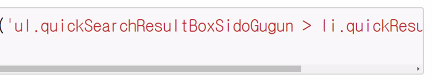

In [14]:
#names =
names=soup.select('ul.quickSearchResultBoxSidoGugun > li.quickResultLstCon>strong')
len(names)
#addr = soup.select('ul.quickSearchResultBoxSidoGugun > li.quickResultLstCon>p')
name = soup.select('ul.quickSearchResultBoxSidoGugun > li.quickResultLstCon>strong')

In [15]:
#지점명,주소,전화번호
names = []
addrs = []
tels = []
length = soup.select('ul.quickSearchResultBoxSidoGugun > li.quickResultLstCon>strong')
for i in range(len(length)):
    name = soup.select('ul.quickSearchResultBoxSidoGugun > li.quickResultLstCon>strong')[i].text.strip()
    addr = soup.select('li.quickResultLstCon>p')[i].text[:-9]
    tel = soup.select('li.quickResultLstCon>p')[i].text[-9:]
    
    names.append(name)
    addrs.append(addr)
    tels.append(tel)
len(names), len(addrs), len(tels)

(58, 58, 58)

In [16]:
starbuck = pd.DataFrame({'names':names,'addrs':addrs,'tels':tels})
starbuck.set_index('names',inplace=True)

In [17]:
starbuck.to_csv('starbuck.csv',encoding='utf-8')

#### 스타벅스 영양정보 가져오기

In [18]:
driver = wb.Chrome()
driver.get("https://www.starbucks.co.kr/menu/drink_list.do")

In [19]:
search = driver.find_element(By.CLASS_NAME,"a2").click()
search

In [20]:
#페이지요청하기
soup = bs(driver.page_source,'lxml')
coffee_info = soup.select('.coffeeInfo.mb60>tbody > tr')
#.coffeelnfo.mb60 mb60
len(coffee_info)
# coffee_infos = soup.select('.coffeeInfo.mb60>tbody > tr ')
# menuName = coffee_info[0]
# kcal = coffee_info[1]
# sugar = coffee_info[2]
# protein = coffee_info[3]
# natrium = coffee_info[4]
# fat = coffee_info[5]
# cafeeine = coffee_info[6]

134

In [21]:
for i in coffee_info:
    print(i.text)

 나이트로 바닐라 크림 80 10 1 40 2 232 
 나이트로 콜드 브루 5 0 0 5 0 245 
 돌체 콜드 브루 265 29 8 130 9 150 
 바닐라 크림 콜드 브루 125 11 3 58 6 150 
 벨벳 다크 모카 나이트로 150 17 2 15 6 190 
 시그니처 더 블랙 콜드 브루 25 0 0 50 0 680 
 제주 비자림 콜드 브루 340 43 10 140 8 105 
 콜드 브루 5 0 0 11 0 150 
 콜드 브루 몰트 505 41 7 150 20 190 
 콜드 브루 오트 라떼 120 14 1 95 0.3 65 
 콜드 브루 플로트 225 18 3 70 10 190 
 아이스 커피 5 0 0 10 0 140 
 오늘의 커피 5 0 0 10 0 260 
 에스프레소 콘 파나 30 1 0 0 1.5 75 
 에스프레소 마키아또 10 0 1 0 0 75 
 아이스 카페 아메리카노 10 0 1 5 0 150 
 카페 아메리카노 10 0 1 5 0 150 
 아이스 카라멜 마키아또 190 22 6 110 4.6 75 
 카라멜 마키아또 200 22 8 130 5 75 
 아이스 카푸치노 115 9 6 90 3.5 75 
 카푸치노 110 8 6 70 3 75 
 라벤더 카페 브레베 400 30 8 140 22 105 
 럼 샷 코르타도 70 8 3 45 1.8 160 
 바닐라 빈 라떼 245 27 9 150 6 210 
 사케라또 비안코 오버 아이스 270 14 3 45 18 315 
 스타벅스 돌체 라떼 255 39 12 190 2.6 150 
 아이스 라벤더 카페 브레베 335 27 6 110 18 105 
 아이스 바닐라 빈 라떼 155 20 5 75 2.9 210 
 아이스 스타벅스 돌체 라떼 230 35 10 145 2.5 150 
 아이스 카페 라떼 110 8 6 75 3.5 75 
 카페 라떼 180 13 10 115 5 75 
 아이스 카페 모카 250 21 7 70 8 95 
 아이스 화이트 초콜릿 모카 260 2

In [22]:
coffee_info[0].select('td')[0].text

'나이트로 바닐라 크림'

In [23]:
#6가지 영양 정보 가져오기
menuNames = []
kcals = []
sugars = []
proteins = []
natriums = []
fats = []
cafeeines = []

length = soup.select("tbody > tr")

for i in coffee_info:
    menuNames.append(i.select('td')[0].text)
    kcals.append(i.select('td')[0].text)
    sugars.append(i.select('td')[0].text)
    proteins.append(i.select('td')[0].text)
    natriums.append(i.select('td')[0].text)
    fats.append(i.select('td')[0].text)
    cafeeines.append(i.select('td')[0].text)
    
    

In [24]:
menuNames[3]

'바닐라 크림 콜드 브루'

In [25]:
len(menuNames),len(kcals),len(sugars),len(proteins),len(natriums),len(fats),len(cafeeines)

(134, 134, 134, 134, 134, 134, 134)

In [26]:
# menuNames
# kcals
# sugars
# proteins
# natriums
# fats
# cafeeines

In [27]:
coffee_dic = pd.DataFrame({'메뉴명':menuNames, '칼로리':kcals, '설탕':sugars,
             'protenis':proteins, 'natriums':natriums, 'fats':fats,
             'cafeeines':cafeeines})

# starbuck = pd.DataFrame({'names':names,'addrs':addrs,'tels':tels})

In [28]:
pd.DataFrame(coffee_dic)

,메뉴명,칼로리,설탕,protenis,natriums,fats,cafeeines
0,나이트로 바닐라 크림,나이트로 바닐라 크림,나이트로 바닐라 크림,나이트로 바닐라 크림,나이트로 바닐라 크림,나이트로 바닐라 크림,나이트로 바닐라 크림
1,나이트로 콜드 브루,나이트로 콜드 브루,나이트로 콜드 브루,나이트로 콜드 브루,나이트로 콜드 브루,나이트로 콜드 브루,나이트로 콜드 브루
2,돌체 콜드 브루,돌체 콜드 브루,돌체 콜드 브루,돌체 콜드 브루,돌체 콜드 브루,돌체 콜드 브루,돌체 콜드 브루
3,바닐라 크림 콜드 브루,바닐라 크림 콜드 브루,바닐라 크림 콜드 브루,바닐라 크림 콜드 브루,바닐라 크림 콜드 브루,바닐라 크림 콜드 브루,바닐라 크림 콜드 브루
4,벨벳 다크 모카 나이트로,벨벳 다크 모카 나이트로,벨벳 다크 모카 나이트로,벨벳 다크 모카 나이트로,벨벳 다크 모카 나이트로,벨벳 다크 모카 나이트로,벨벳 다크 모카 나이트로
...,...,...,...,...,...,...,...
129,햇사과 주스 190ML,햇사과 주스 190ML,햇사과 주스 190ML,햇사과 주스 190ML,햇사과 주스 190ML,햇사과 주스 190ML,햇사과 주스 190ML
130,딸기 가득 요거트 190ML,딸기 가득 요거트 190ML,딸기 가득 요거트 190ML,딸기 가득 요거트 190ML,딸기 가득 요거트 190ML,딸기 가득 요거트 190ML,딸기 가득 요거트 190ML
131,블루베리 요거트 190ML,블루베리 요거트 190ML,블루베리 요거트 190ML,블루베리 요거트 190ML,블루베리 요거트 190ML,블루베리 요거트 190ML,블루베리 요거트 190ML
132,애플망고 코코넛 190ML,애플망고 코코넛 190ML,애플망고 코코넛 190ML,애플망고 코코넛 190ML,애플망고 코코넛 190ML,애플망고 코코넛 190ML,애플망고 코코넛 190ML


In [29]:
import pandas as pd
coffee_info = pd.DataFrame(coffee_dic)

In [30]:
coffee_info.to_csv('coffee_info',encoding='utf-8')